In [1]:
# Getting stated : load nessesory libraries.
import pandas as pd # For working with data
import numpy as np # For stats and faster array calculations
import seaborn as sns # For visualization
import matplotlib.pyplot as plt
df1 = pd.read_csv("Data//Wine Quality//winequality-red.csv") # Loading the csv file into dataframe



In [43]:
df = df1.copy() # Making a copy of data always helps.

In [44]:
df.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## All the featues are numericals.
### 1.This problem can be persued as Regression problem as well as classification problem. 2.All the numerical features helps as we don't need to spend much time in data preprocessing,converting categorical data to numerical

In [46]:
df.isnull().sum() # Do we have any nyll values or not

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
df.describe() # Getting an overview of data, how the feature are spreaded.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Looking at the 50%,75% and maximum value, It seems that some of the features need outlier treatment.[residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide]
#### Also we don't have any null values. This will save time from missing-value treatment.

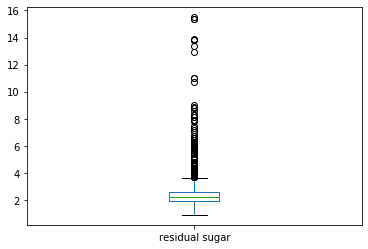

In [48]:
df['residual sugar'].plot(kind='box')# take a look at destribution

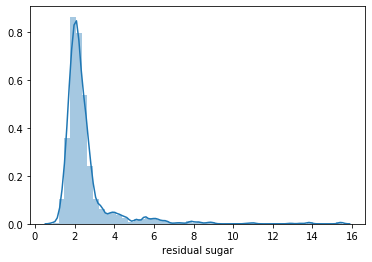

In [49]:
sns.distplot(df['residual sugar'])

#### most of the data lies below 5. Values greater than 5 can be treated as outliers. 

In [50]:
temp = df[df['residual sugar']<5]['residual sugar']
temp = temp.mean() #we can take mode() but the distribution is a skewed normal distribution so, won't make much difference.

boolean = df['residual sugar']>5

df.loc[boolean,'residual sugar'] = df.loc[boolean,'residual sugar'].apply(lambda x : temp)

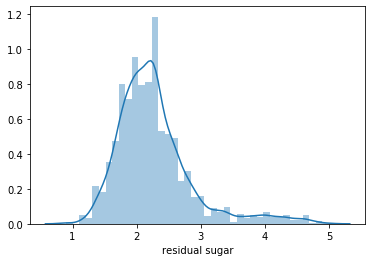

In [51]:
sns.distplot(df['residual sugar']) #after outlier treatment

### We'll apply the above technique to all the features having outliers problem.

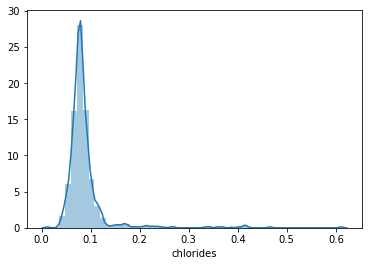

In [52]:
sns.distplot(df['chlorides'])

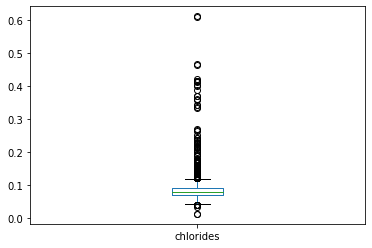

In [53]:
df['chlorides'].plot(kind='box')

In [54]:
temp = df[df['chlorides']<0.2]['chlorides']
temp = temp.mean()

boolean = df['chlorides']>0.2

df.loc[boolean,'chlorides'] = df.loc[boolean,'chlorides'].apply(lambda x : temp)

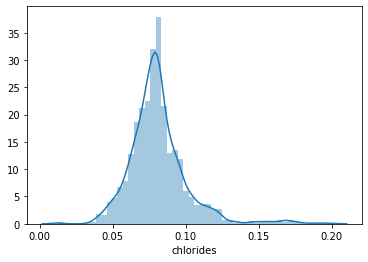

In [55]:
sns.distplot(df['chlorides'])

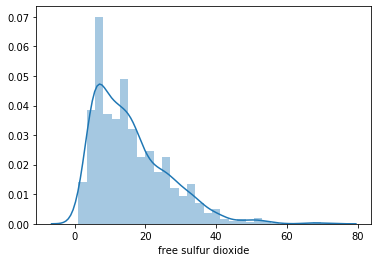

In [56]:
sns.distplot(df['free sulfur dioxide'])

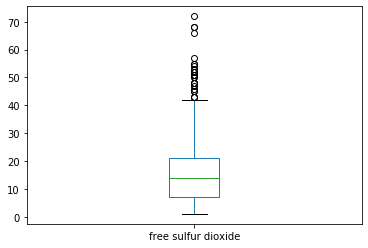

In [57]:
df['free sulfur dioxide'].plot(kind='box')

In [58]:
temp = df[df['free sulfur dioxide']<40]['free sulfur dioxide']
temp = temp.mean()

boolean = df['free sulfur dioxide']>40

df.loc[boolean,'free sulfur dioxide'] = df.loc[boolean,'free sulfur dioxide'].apply(lambda x : temp)

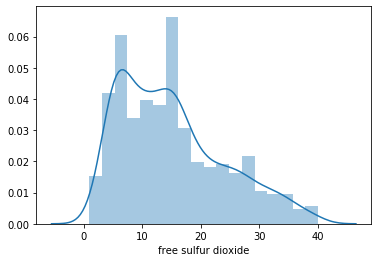

In [59]:
sns.distplot(df['free sulfur dioxide'])

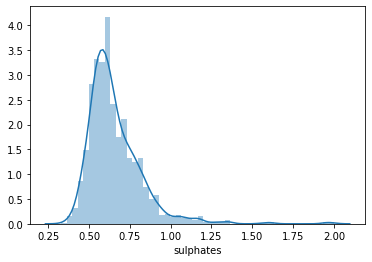

In [60]:
sns.distplot(df['sulphates'])

In [61]:
temp = df[df['sulphates']<1.25]['sulphates']
temp = temp.mean()

boolean = df['sulphates']>1.25

df.loc[boolean,'sulphates'] = df.loc[boolean,'sulphates'].apply(lambda x : temp)

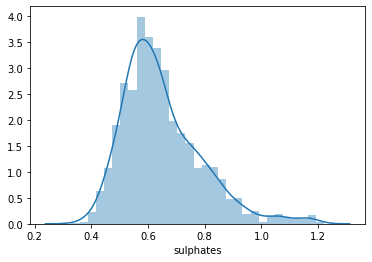

In [62]:
sns.distplot(df['sulphates'])

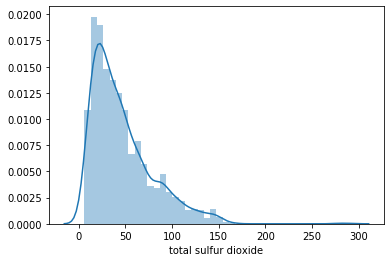

In [63]:
sns.distplot(df['total sulfur dioxide'])

In [64]:
temp = df[df['total sulfur dioxide']<150]['total sulfur dioxide']
temp = temp.mean()

boolean = df['total sulfur dioxide']>150

df.loc[boolean,'total sulfur dioxide'] = df.loc[boolean,'total sulfur dioxide'].apply(lambda x : temp)

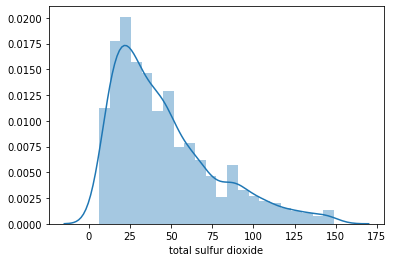

In [65]:
sns.distplot(df['total sulfur dioxide'])

In [66]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.273767,0.081134,14.999769,45.690566,0.996747,3.311113,0.648698,10.422983,5.636023
std,1.741096,0.179060,0.194801,0.597699,0.020132,8.878583,30.970446,0.001887,0.154386,0.140222,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.500000,0.089000,20.000000,61.000000,0.997835,3.400000,0.720000,11.100000,6.000000
max,15.900000,1.580000,1.000000,5.000000,0.200000,40.000000,149.000000,1.003690,4.010000,1.220000,14.900000,8.000000


### Our data and target values were in the same dataframe, now that the data preprocessing is done we can move forward to split our data into Data(X) and target(Y).

#### Also, looking at the data, we need to do some featurescaling as well, as the feature have different range of values

In [67]:
x = df.drop('quality',axis=1)
y = df.quality
y = np.array(y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [68]:
# Loading ML regression models.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [69]:
from sklearn.model_selection import cross_validate # cross validation is used to measure how godd a ML model performes on data

In [70]:
cross_validate(lr,x,y)

C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.        , 0.00099421, 0.00199986]),
 'score_time': array([0.00522757, 0.00412822, 0.        ]),
 'test_score': array([0.30424103, 0.36288638, 0.32792298])}

In [71]:
cross_validate(dtr,x,y)

C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'fit_time': array([0.01017356, 0.00878906, 0.01155782]),
 'score_time': array([0.00102448, 0.00099707, 0.00166106]),
 'test_score': array([-0.42824824, -0.48944494, -0.43765946])}

In [72]:
cross_validate(rfr,x,y)

C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'fit_time': array([0.05899811, 0.06639767, 0.05770373]),
 'score_time': array([0.00256276, 0.00318813, 0.00545692]),
 'test_score': array([0.23969195, 0.24997227, 0.25987908])}

### No ML model has performed as per our expectation.
#### Let's see if we can achive better results with RandomForestRegressor

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,stratify=y)

score_list =[]
for i in range(2,100,5):
    rfr = RandomForestRegressor(n_estimators = i)
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    score_list.append(mean_absolute_error(y_test,pred))

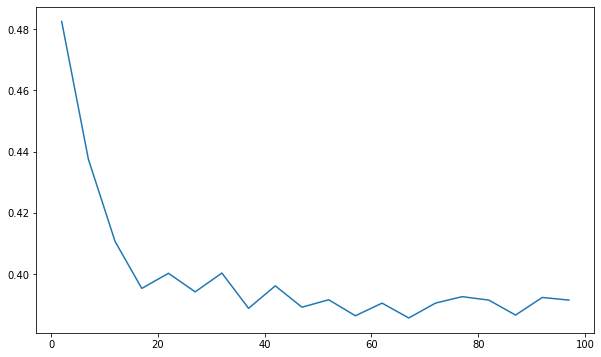

In [76]:
fig = plt.figure(figsize = (10,6))
plt.plot(list(range(2,100,5)),score_list)

#### After increasing n_estimators(trees in random forest) in RFR model, we get mean_absolute_error around 0.38-0.40 Which means accuracy around 60-62%. This can be considered as a good regression model for this data.

In [77]:
rfr = RandomForestRegressor(n_estimators=35)
rfr.fit(x_train,y_train)
pred = rfr.predict(x_test)
mean_absolute_error(y_test,pred)

0.3950714285714285

## Now We'll Move to the Classificaion problem.
### For this, we can describe wine qualities as good, bad or normal.

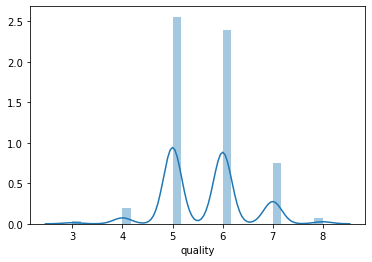

In [78]:
sns.distplot(df['quality']) # To get an idea about the distibution of wine quality data

#### Wine having quality score <4.5 can be considered as poor and >6.5 as good quality wine.

In [79]:
### Generating Categorical Column.

def applier(x):
    if x<4.5:
        return 'bad'
    elif 4.5<x<6.5:
        return 'normal'
    else :
        return 'good'

df['type'] = df['quality'].apply(lambda x : applier(x))

In [80]:
### We have to again specify our data(x) and target(x) for models. 

x = df.drop(columns=['quality','type'])
y = df[['type']]


In [81]:
### We need to do go through the feature scaling process again, as we have new unprocessed data.

from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler1 = StandardScaler()
x = scaler1.fit_transform(x)

In [82]:
### importing ML classification models.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [83]:
### We'll implement the cross validation process from skretch.

lr_pred = []
dtc_pred = []
rfc_pred = []
gnb_pred = []

from sklearn.model_selection import KFold
kf = KFold(5)

kf.get_n_splits(x)
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    lr.fit(X_train,y_train)
    dtc.fit(X_train,y_train)
    rfc.fit(X_train,y_train)
    gnb.fit(X_train,y_train)
    
    lr_pred.append(lr.score(X_test,y_test))
    dtc_pred.append(dtc.score(X_test,y_test))
    rfc_pred.append(rfc.score(X_test,y_test))
    gnb_pred.append(gnb.score(X_test,y_test))
print(lr_pred,dtc_pred,rfc_pred,gnb_pred,sep='\n')

C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\raj-pc\Anaconda3\lib\site-packages\ipykernel

[0.878125, 0.821875, 0.840625, 0.78125, 0.8683385579937304]
[0.803125, 0.746875, 0.784375, 0.7, 0.7774294670846394]
[0.871875, 0.78125, 0.81875, 0.765625, 0.8463949843260188]
[0.846875, 0.75625, 0.821875, 0.734375, 0.7836990595611285]


C:\Users\raj-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## As we can see, LogisticRegression and RandomForest performs better than DecisionTree or NaiveBayes
### This is because, DecisionTree useually overfits the training data and NaiveBayes expects features to be naive(unrelated to each other) bacause it works on bayes theorem which is only applied on a set of independent events.